# Introducción

Smite es un juego online y multijugador en el que dos equipos se enfrentan por ser el primero en cumplir un cierto objetivo. En este trabajo voy a centrarme en su modo de juego más popular, el modo Conquest, que, en esencia, es igual que una partida de otro juego más conocido, League of Legends.

Los equipos son de 5 jugadores, cada uno cumpliendo un rol: Mid, Carry, Support, Solo o Jungle. Sin entrar muy en detalle, cada rol tiene asociado un tipo de personaje, al que nos referiremos como "clase":

+ Mid: mage (mago).
+ Carry: hunter (cazador).
+ Support: guardian.
+ Solo: warrior (guerrero).
+ Jungle: assassin (asesino).

No obstante, aunque un personaje sea mago, no tiene por qué limitarse a jugar de Mid. Por ejemplo, tenemos a He Bo (Mago), que se usa como Mid, Jungle y Solo.

Finalmente, a los personajes jugables nos referiremos como "dioses", por la temática del juego.


## Motivación del trabajo

Inicialmente, solo están disponibles una pequeña porción de los dioses y hay, básicamente, tres formas de desbloquear el resto:

+ Comprándolos con la moneda que se consigue jugando (o dinero real).

+ Regalos del juego: cuando se juegan las primeras partidas, el juego te recompensa con un dios gratis de entre todos los disponibles. Esto solo ocurre dos veces:
    + La primera, cuando el juego considera que estás preparado para enfrentarte a jugadores reales (hasta este momento, el equipo contrario era de bots).
    + La segunda, cuando el jugador está bien familiarizado con el juego y, típicamente, tiene un rol favorito. 

+ Rotaciones semanales: temporalmente se encuentran disponibles un dios de cada clase para poder jugarlos aunque no los tengas comprados. Estas rotaciones son las mismas para todos los jugadores.

Hay varias mejoras posibles para estos sistemas, incorporando un sistema de recomendación de dioses, que mejorarían la experiencia del jugador, favoreciendo la captación y la permanencia de nuevos jugadores.

### Limitar los dioses regalados

Dentro de la misma clase tenemos varios estilos a la hora de jugar. Por ejemplo, en la clase Hunter podemos distinguir a los que se centran en atacar con sus habilidades o los que usan sus ataques básicos. Sin embargo, esta información no se encuentra disponible dentro de Smite, imagino porque estas clasificaciones son sensibles al estado del juego y, con el creciente número de dioses disponibles, se vuelve inviable hacer un estudio tan detallado de cada dios en cada actualización.

Este no es un problema para un jugador veterano, pero, para un jugador novel, esta falta de información provoca que puedan elegir un dios que, a priori debería adecuarse a su estilo de juego, pero acaben decepcionados al probarlo, sintiendo que han malgastado la oportunidad de elegir un dios gratis. Es por esto que propongo limitar la elección de dioses a los diez más afines a su estilos de juego, con lo que sigue pudiendo elegir entre un número importante de dioses, pero la probabilidad de acierto aumenta.

Cuando se acceda por segunda vez a esta recompensa, tendremos más datos del jugador y, seguramente, este ya tenga un rol favorito. Entonces, podríamos plantear el limitar aún más la oferta de dioses, para que el jugador pueda analizar cada uno en mayor detalle.

### Rotaciones personalizadas

La variedad de dioses que da el sistema actual me parece buena idea, porque podría incitar al jugador a adentrarse en un nuevo rol o a descubrir un estilo de juego que le resulte más agradable. No obstante, podríamos recomendar en la rotación los más afines a él, aunque tendríamos que evitar que se repitan esos dioses en un cierto número de semanas posteriores, promoviendo también la variedad. De esta forma, cada jugador contaría con una rotación semanal personalizada.

### Recomendación de dioses

La principal forma de adquisición de dioses es comprarlos en la tienda con la moneda del juego (obtenida al jugar partidas). Por los mismos motivos que hemos expuesto en los apartados anteriores, opino que la tienda se beneficiaría de un apartado con recomendaciones personalizadas o de un filtro que los ordenara por afinidad al jugador.


## Metodología

Empezaremos extrayendo la información pública disponible de los jugadores profesionales de Smite y otros jugadores noveles (ver notebook "Scrap-player-info"). Concretamente, usaremos las **horas de uso** de cada personaje como indicación de lo que le ha gustado a ese jugador. Además, nos limitaremos a las dos últimas temporadas del juego, la Season 10 y la Season 11. Esto es porque de la Season 9 a la 10 hubo un salto importante en las mecánicas del juego que lo cambiaron de forma notable y, por otro lado, la Season 11 empezó hace pocos meses, por lo que podríamos tener pocos datos para trabajar.

Después, construiremos la matriz de correlación de los jugadores y, con ella, haremos el sistema de recomendación. Por último, evaluaremos algunos casos concretos.

# Sistema de recomendación de dioses

## Carga de librerías y datos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sb

Los datos se han obtenido mediante scrapping de [smite.guru](https://smite.guru/), como se indica en el notebook "Scrap-player-info":

In [2]:
df = pd.read_csv("data/players_info__seasons10y11.csv", index_col=0)
df.head()

,Arachne,Awilix,Bakasura,Bastet,Camazotz,Cliodhna,Da Ji,Fenrir,Hun Batz,Kali,...,Mulan,Nike,Odin,Osiris,Shiva,Sun Wukong,Surtr,Tyr,Vamana,Unnamed: 132
Julio,0.383333,0.166667,0.75,0.0,0.783333,0.000000,0.0,0.0,0.650000,0.25,...,1.033333,9.250000,5.116667,8.016667,3.433333,33.15,1.516667,68.366667,19.116667,0
Hawkk,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,...,0.000000,3.666667,0.000000,0.000000,0.000000,0.00,0.000000,3.083333,0.000000,0
Dzoni,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0
Spudio,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0
Cozyx,0.000000,0.000000,0.00,0.0,0.416667,0.083333,0.0,0.0,0.583333,0.00,...,0.000000,0.500000,0.000000,0.933333,0.000000,0.00,0.000000,0.000000,0.533333,0


Vamos a hacer varias cosas:

+ Se han añadido en la escritura/lectura del .csv columnas extra, así que vamos a eliminarlas para asegurar que no son recomendadas ni afectan a la correlación.
+ También vamos a eliminar jugadores que no aporten nada. Estos serán los que tengan 0 en el tiempo de uso de todos los dioses, ya sea porque no han jugado en estas Seasons, o porque tienen la cuenta en privado.

In [3]:
# Eliminamos fallos de guardado: columnas extra
gods = pd.read_csv("data/gods_names_roles.txt", header=None)
god_names = gods.iloc[:,0]
gods_roles = gods.set_index(0)
gods_roles.columns = ["rol"]

for god in df.columns:
    if god not in god_names.values: # columnas que no correspondan a un dios de la lista
        df = df.drop(labels=[god], axis=1) 

# Eliminamos personas que sean todo ceros
df = df.drop(labels=df.loc[(df==0).all(axis=1), :].index, axis=0)

También podemos ver cuáles son los dioses más populares:

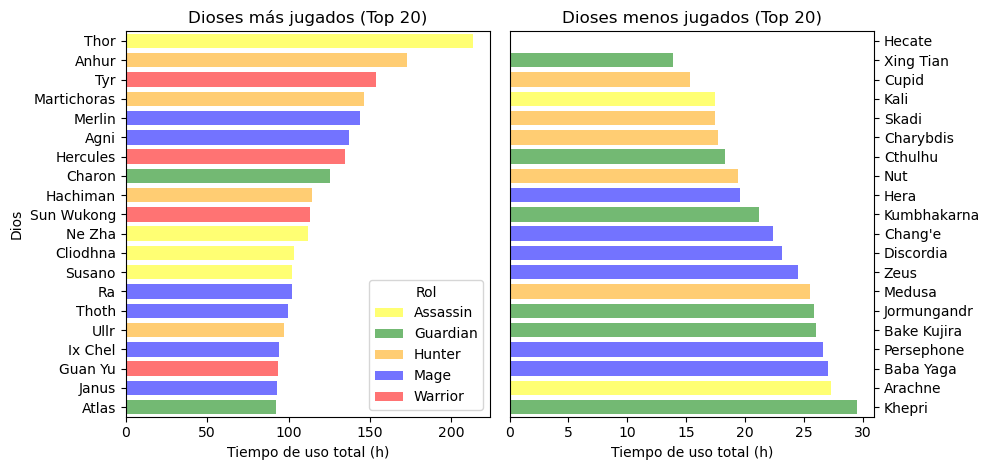

In [4]:
total_jugado_dios = df.sum()
total_jugado_dios = pd.concat([total_jugado_dios, gods_roles], axis=1).reset_index()
total_jugado_dios.columns = ["Dios", "Tiempo de uso total (h)", "Rol"]
total_jugado_dios = total_jugado_dios.sort_values("Tiempo de uso total (h)", ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)

# Dioses más jugados
sb.barplot(data = total_jugado_dios.iloc[:20,:],
            y="Dios", x="Tiempo de uso total (h)",
            hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
            hue = "Rol",
           palette=["yellow", "green", "orange", "blue", "red"], 
           dodge = False, width=0.75, alpha=0.55, saturation=1,ax=ax[0])
ax[0].title.set_text('Dioses más jugados (Top 20)')

## Dioses menos jugados
sb.barplot(data=total_jugado_dios.iloc[-1:-21:-1, :],
           y="Dios", x="Tiempo de uso total (h)",
            hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
            hue = "Rol",
           palette=["yellow", "green", "orange", "blue", "red"], 
           dodge = False, width=0.75, alpha=0.55, saturation=1,ax=ax[1])
# ax[1].yaxis.tick_right()
ax[1].set_ylabel("")
ax[1].title.set_text('Dioses menos jugados (Top 20)')
ax[1].yaxis.tick_right()
plt.legend([],[], frameon=False)

fig.tight_layout()
plt.show();

Aunque el sistema no debería recomendar necesariamente los más populares, sí que deberían estar favorecidos. Por ejemplo, si una persona solo juega con Magos, no parece razonable recomendarle a Thor, pero sí a Merlin. También es de esperar que Hecate no se recomiende, porque solo está anunciada, no en el juego, por lo que es imposible que alguien tenga horas de uso con ella.

## Recomendaciones

Representamos la matriz de correlación entre los jugadores que quedan:

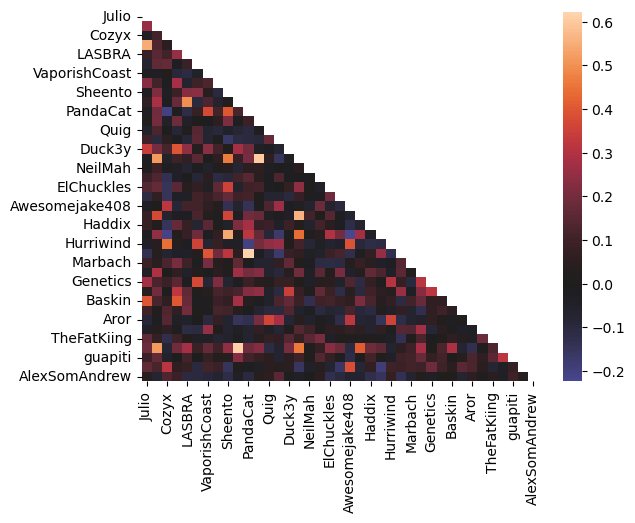

In [5]:
# Matriz de correlaciones entre jugadores
corr = df.T.corr()

# Mask: solo triángulo superior
mask = np.triu(corr)

# Heatmap
fig, ax = plt.subplots()
sb.heatmap(corr, center = 0, mask=mask)
plt.show()

Tenemos un buen rango de correlaciones. Vemos casos con correlación alta, en el caso (Zapman, PandaCat) por ejemplo, y también hay casos con correlación negativa, por ejemplo el caso (Venenu, L1mmbo).

#### Función de recomendación

In [6]:
def recomendaciones(user, data):
    most_fitting = []
    corr = data.T.corr().loc[user] # usamos la correlación entre usuarios como peso

    # Posibles recomendaciones: personajes que no ha probado
    new_gods = [c for c in data.columns 
                if (data.loc[user].isna()[c] or data.loc[user, c] == 0)]

    # Calculo de scores
    for god in new_gods:
        m = pd.concat([corr, data[god]], axis = 1)
        m["Score"] = m[user] * m[god] # correlación * tiempo de uso

        # Media ponderada
        god_score =  m["Score"].sum() / m[user].sum()

        # Recomendaciones
        most_fitting.append((god, god_score))

    # Return los dioses ordenados por su score
    return [(personaje[0], gods_roles.loc[personaje[0], "rol"], personaje[1])
           for personaje in sorted(most_fitting, key=lambda x: x[1], reverse = True)]

# Pruebas del modelo de recomendación colectiva

## Función de estudio

Los colores utilizados para cada clae son los correspondientes en el juego.

In [7]:
def estudio_usuario(user, data):
    # --- Información del usuario ---
    # Dioses jugados
    user_info = data.loc[user,:]
    user_info = user_info[user_info != 0] # dioses usados por "user"
    user_info = pd.concat([user_info, gods_roles], axis=1, join="inner").reset_index() # nueva columna con los roles de cada uno
    user_info.columns = ["Dioses", "Tiempo de uso (h)", "Rol"]
    user_info = user_info.sort_values("Tiempo de uso (h)")

    # Total de tiempo jugado por rol
    total_uso_por_rol = user_info.loc[:, ["Rol", "Tiempo de uso (h)"]].groupby("Rol").sum().reset_index()

    # Nombre, Rol y Score de los Dioses recomendados
    recomendados = pd.DataFrame(recomendaciones(user, data))
    recomendados.columns = ["Dios", "Rol", "Score"]
    
    # Suma de los scores por clase
    total_scores = recomendados.loc[:, ["Rol", "Score"]].groupby("Rol").sum().reset_index()
    total_scores.columns = ["Rol", "Total Score"]

    
    # --- Figura 1: dioses de cada rol jugados y tiempo de juego en cada rol ---
    fig1, ax = plt.subplots(nrows=1, ncols=2)
    fig1.set_figwidth(10)
    
    # Dioses jugados de cada rol
    sb.histplot(data = user_info,
                x="Rol",
                hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
                hue = "Rol",
               palette=["yellow", "green", "orange", "blue", "red"],
               legend = False, ax=ax[0])
    ax[
    0].title.set_text('Dioses jugados en cada rol')
    ax[0].set_ylabel('Número de personajes')
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Horas de juego en cada rol
    ## Barras
    sb.barplot(data = total_uso_por_rol,
                x="Rol", y="Tiempo de uso (h)",
                hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
                hue = "Rol",
               palette=["yellow", "green", "orange", "blue", "red"], 
               dodge = False, width=1, alpha=0.55, saturation=1,ax=ax[1])
    ## Líneas
    sb.barplot(data = total_uso_por_rol,
                x="Rol", y="Tiempo de uso (h)",
                fill=None, dodge = False, width=1, ax=ax[1],
               edgecolor="black", linewidth=1)
    
    ax[1].legend([],[], frameon=False)
    ax[1].title.set_text('Tiempo de juego en cada rol')
    ax[1].set_ylabel('Horas')

    plt.close()

    
    # --- Figura 2: numero de dioses recomendados por rol y score total de cada rol ---
    fig2, ax = plt.subplots(nrows=1, ncols=2)
    fig2.set_figwidth(10)
    
    # Número de dioses recomendados de cada rol
    sb.histplot(data = recomendados.iloc[:20,:],
                x="Rol",
                hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
                hue = "Rol",
               palette=["yellow", "green", "orange", "blue", "red"],
               legend = False, ax=ax[0])
    ax[0].title.set_text('Roles recomendados (Top 20)')
    ax[0].set_ylabel('Número de dioses')
    ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Horas de juego en cada rol
    ## Barras
    sb.barplot(data = total_scores,
                x="Rol", y="Total Score",
                hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
                hue = "Rol",
               palette=["yellow", "green", "orange", "blue", "red"], 
               dodge = False, width=1, alpha=0.55, saturation=1,ax=ax[1])
    ## Líneas
    sb.barplot(data = total_scores,
                x="Rol", y="Total Score",
                fill=None, dodge = False, width=1, ax=ax[1],
               edgecolor="black", linewidth=1)
    
    ax[1].legend([],[], frameon=False)
    ax[1].title.set_text('Suma del Score por clase')

    plt.close()

    
    # --- Figura 3: dioses recomendados y no recomendados ---
    fig3, ax = plt.subplots(nrows=1, ncols=2)
    fig3.set_figwidth(10)
    
    # Dioses recomendados
    sb.barplot(data = recomendados.iloc[:15,:],
                y="Dios", x="Score",
                hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
                hue = "Rol",
               palette=["yellow", "green", "orange", "blue", "red"], 
               dodge = False, width=0.75, alpha=0.55, saturation=1,ax=ax[0])
    ax[0].title.set_text('Dioses recomendados (Top 15)')

    # Dioses NO recomendados
    sb.barplot(data=recomendados.iloc[-1:-16:-1, :],
               y="Dios", x="Score",
                hue_order=["Assassin", "Guardian", "Hunter", "Mage", "Warrior"],
                hue = "Rol",
               palette=["yellow", "green", "orange", "blue", "red"], 
               dodge = False, width=0.75, alpha=0.55, saturation=1,ax=ax[1])
    ax[1].yaxis.tick_right()
    ax[1].set_ylabel("")
    ax[1].title.set_text('Dioses a evitar (Top 15)')
    ax[1].legend([],[], frameon=False)
      
    plt.close()
    
    return fig1, fig2, fig3

## Casos particulares

### zonyiru 

Vamos a empezar viendo qué es lo que me recomendarían a mi (entro en la categoría de jugador novel).

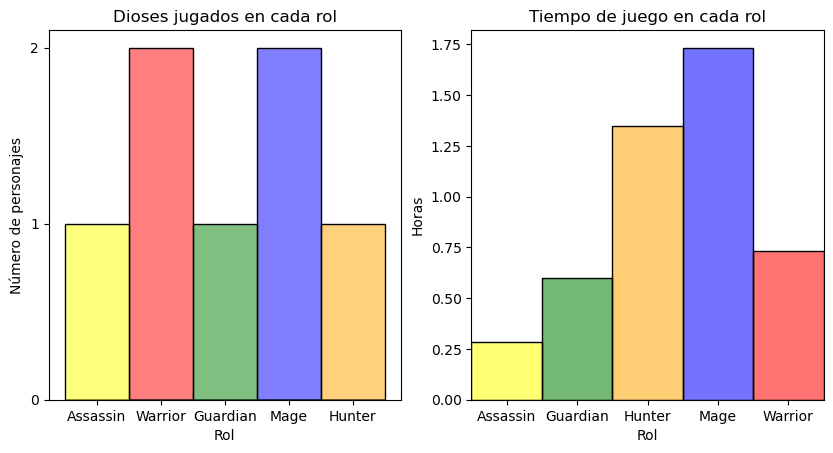

In [8]:
zonyiru = estudio_usuario("zonyiru", df)
zonyiru[0]

+ En la figura derecha vemos que he jugado como mage y hunter la mayor parte del tiempo. Ambas tienen personajes que atacan a distancia y la principal diferencia entre ambas es que el tipo de daño, mágico para el mage y físico para el hunter.

+ Un mage suele jugar con habilidades, mientras que los hunter pueden atacar con habilidades o ataques básicos.

+ También vemos que he probado más mages y warriors que del resto de roles.

Veamos las recomendaciones:

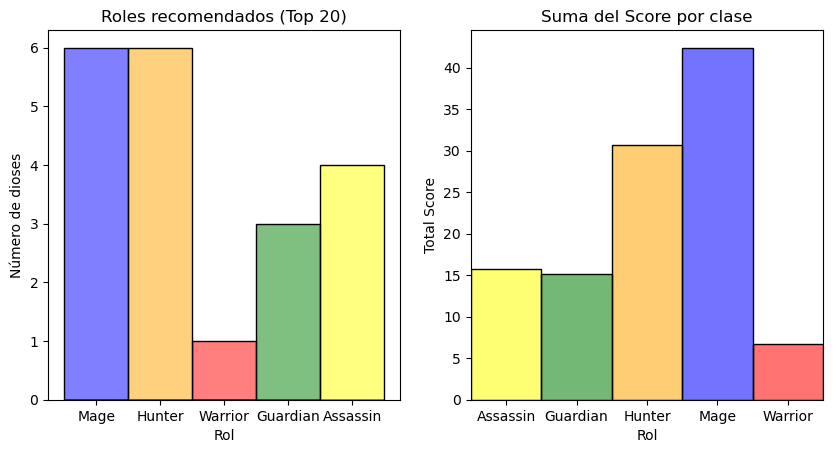

In [9]:
zonyiru[1]

+ En la figura derecha tenemos el score de cada categoría, y vemos que presenta una estructura similar a la del tiempo de juego, aunque los warriors se han visto claramente desfavorecidos.

+ En la figura izquierda tenemos el número de dioses de cada categoría que se han recomendado.

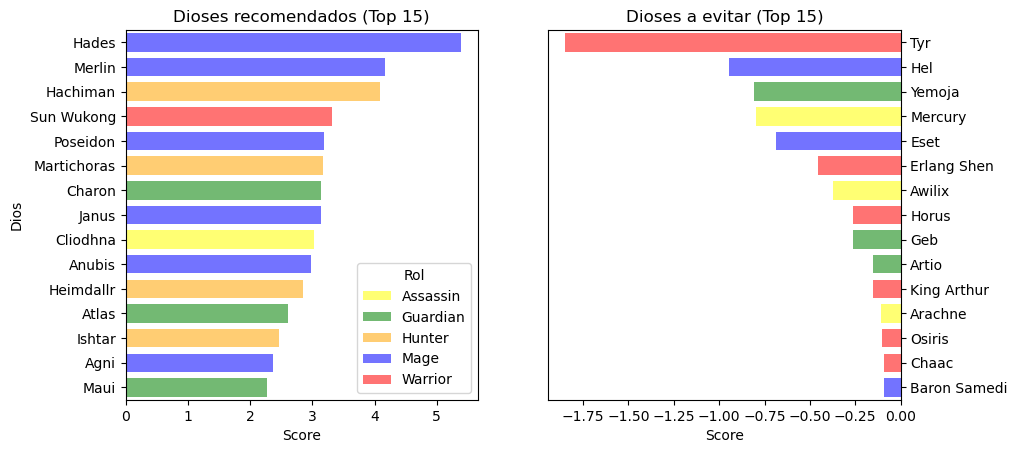

In [10]:
zonyiru[2]

+ El primer puesto es de Hades, que no es el mage más popular, pero parece ser el más adecuado a mi estilo de juego. Esto podría explicarse al tener en cuenta que Hades es un personaje equilibrado entre aguantar golpes (propio de warriors y guardianes) y hacer daño con habilidades (principalemente mages). Es posible, por tanto, que se haya visto también favorecido por mi uso de warriors.

+ También vemos a Charon, que, aun teniendo algunas limitaciones, puede jugarse como mage.

+ Otros personajes a destacar son Anubis y Cliodhna. Anubis fue uno de los personajes que más jugué en Seasons pasadas (hace varios años) y Cliodhna era de los pocos assassins que me llamaban la atención.

Todo esto está basado en mi opinión y es difícilmente demostrable, pero veía necesario dar una explicación inicial con un ejemplo sencillo. Ahora vamos a pasar a casos especiales, empezando uno de los profesionales de Smite.

### Julio

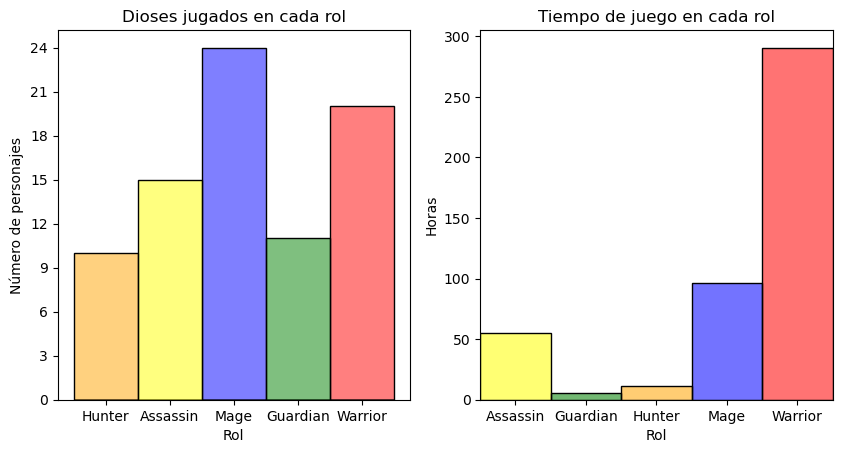

In [11]:
julio = estudio_usuario("Julio", df)
julio[0]

Como podemos ver, Julio juega principalmente con warriors. De hecho, ha jugado con todos los de esta categoría. Esto es porque se ha especializado en el rol de Solo y, por eso mismo, también ha jugado con dioses de otras clases que puedan cumplir el rol de Solo.

Veamos qué se le recomienda:

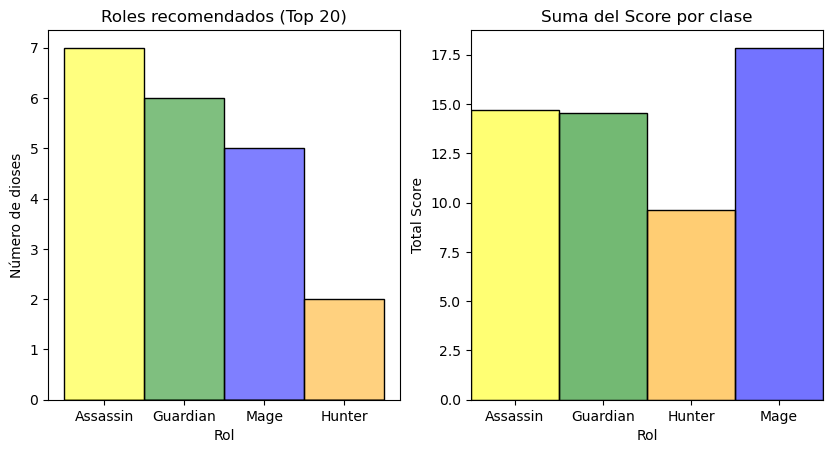

In [12]:
julio[1]

+ Como no le queda ningún warrior por usar, no se le ha recomendado ninguno. Sin embargo, esto, posiblemente ha favorecido la recomendación de guardians, ya que son relativamente similares.

+ También tenemos un alto score en magos, pero no se le han recomendado tantos. Esto, posiblemente, se deba a que no le quedan muchos magos por probar.

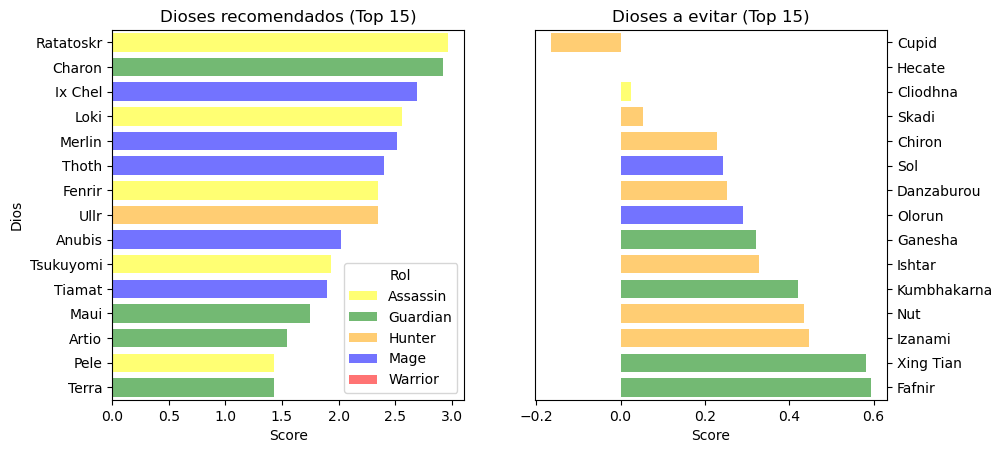

In [13]:
julio[2]

+ Echando un vistazo en [smitefire](https://www.smitefire.com/smite/god/ratatoskr-66), podemos ver que Ratatoskr es viable como Solo (al menos existen jugadores que lo usan así).

+ Charon es un caso más claro de un personaje que puede usarse como Solo, ya que, no solo es capaz de aguantar daño (guardian), sino que también es versátil para combatir (que es un atributo que lo hace más cercano a un warrior).

### R3N3GAN

Vamos a ver cuáles son las recomendaciones de un jugador que encontré en una partida.

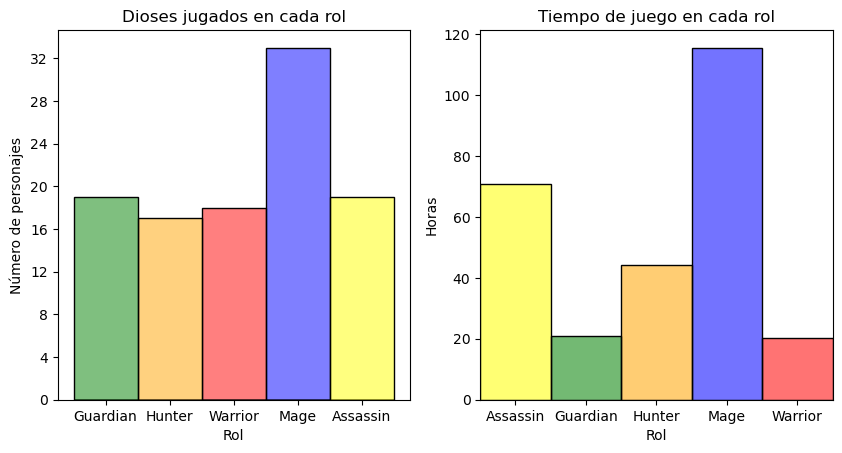

In [14]:
r3n3gan = estudio_usuario("R3N3GAN", df)
r3n3gan[0]

Podemos ver que principalmente juega con magos y assassins, relativamente parecido a mi.

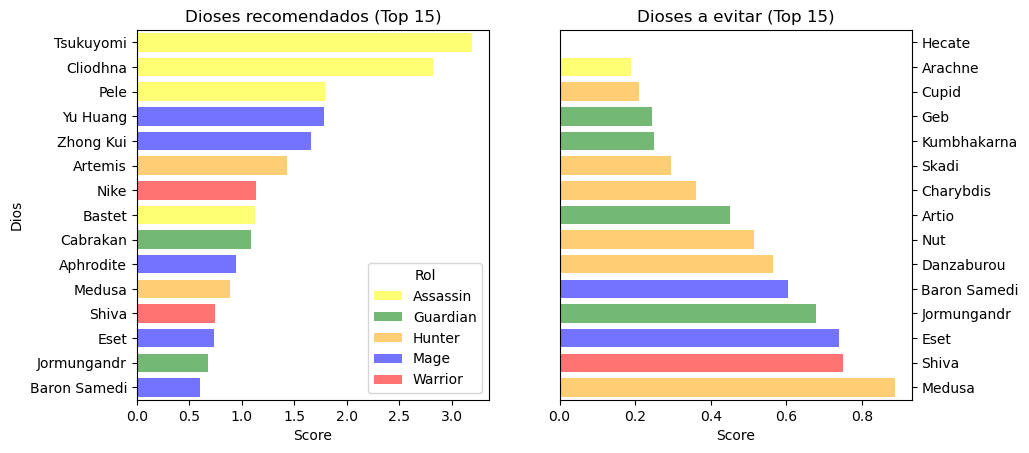

In [15]:
r3n3gan[2]

+ No le quedaban muchos dioses por probar. De hecho, en la figura izquierda, desde Aphrodite hacia abajo están repetidos en la gráfica derecha, por lo que le deben quedar menos de 30 dioses sin usar.

+ Si nos fijamos en los últimos puestos, podemos ver algunos personajes que reciben quejas por estar obsoletos respecto del estado actual del juego: Arachne, Kumbhakarna y Skadi.

+ También tenemos a la nueva diosa, Nut, que no puede tener tanto tiempo de uso como el resto.


### Caso artificial: Assassins

Vamos a suponer que alguien solo ha jugado assassins.

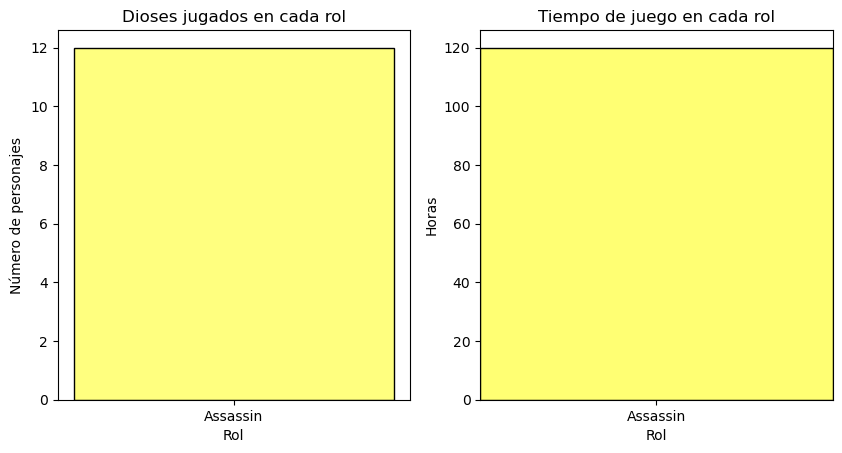

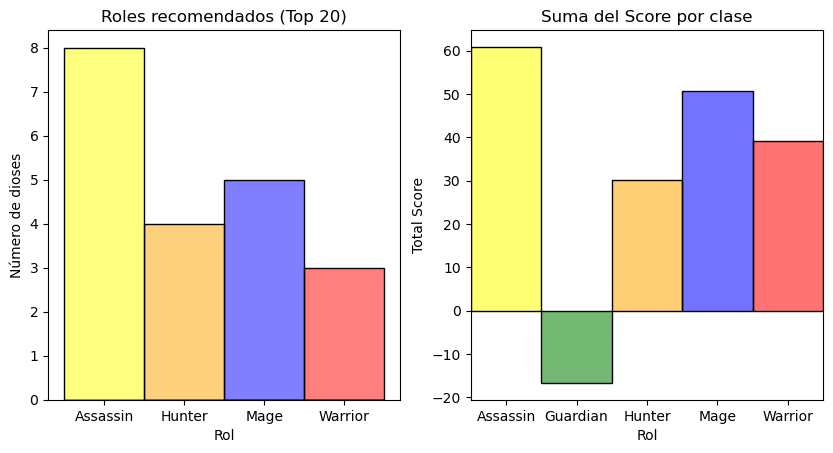

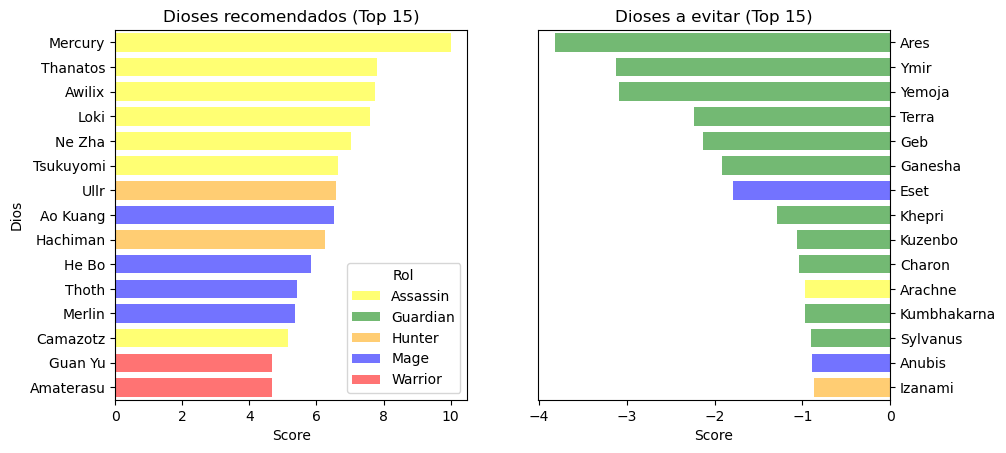

In [16]:
clase = "Assassin"  # <-- Assassin, Mage, Guardian, Hunter o Warrior (por si quieres probar alguno en concreto)
list_gods = list(gods_roles.loc[:, "rol"][(gods_roles.loc[:, "rol"] == clase)].index)
n_dioses = int(0.5 * len(list_gods))

import random
random.seed(33)
random_gods = random.sample(list_gods, k=n_dioses)

copia = df.copy()
copia.loc["Fake_user", :] = 0

copia.loc["Fake_user", random_gods] = 10

fake = estudio_usuario("Fake_user", copia)

for i in range(len(fake)):
    display(fake[i])

+ Las principales recomendaciones son los assassins más populares del juego. De las siguientes, se puede destacar a Ao Kuang, que se usa en el rol Jungle que en Mid (propio de magos).

+ Lo menos recomendado son Guardians. Esto, se deberá a que son la clase menos viable, en general, como jungla (no son capaces de hacer mucho daño) y porque son la clase menos popular del juego.


# Mejoras al sistema de recomendación

Este sistema es sensible a cambios en el sistema de juego y a la región de la que se recojan los datos (Europa, Norte América o Asia). Las actualizaciones ocurren mensualmente, aunque los que alteran considerablemente como funcionan algunos personajes no son tan comunes. Por otro lado, un filtro por regiones ayudaría a dar una recomendación más personalizada, ya que los estilos de juego suelen variar.

En este caso, hemos tomado como base de jugadores a los profesionales que compiten en el torneo más importante de Smite, porque son las personas que marcan tendencias en el juego y los que más experiencia tienen con sus mecánicas. Sin embargo, algunos personajes pueden resultar abrumadores para jugadores noveles, por ejemplo, Merlin, que lo vemos muy recomendado. Sería conveniente ampliar la base de datos para cubrir a este grupo de personas, que son realmente el público objetivo de este sistema.

Otro problema es que hay una clara diferenciación entre un jugador "casual" de Smite y uno de "ranked" (en este modo, se te asignan puntos para escalar puestos) respecto a la elección de los dioses. La mayoría de usuarios que tenemos en nuestro dataset son jugadores de "ranked Conquest", pero los jugadores noveles no tienen disponible este modo. Esto puede darnos de nuevos dioses más complejos como recomendación, aunque, si son viables para ranked, también lo deberían ser para casual. La mejor manera de abordar esto sería hacer un filtrado por modo de juego.

## Mejoras con la API de Hi-Rez

La compañía de Smite nos proporciona una API a través de la que podemos extraer información de los jugadores y de las partidas que se juegan ese día. No obstante, en este momento el acceso se encuentra congelado, ya que no hay respuesta por parte de los administradores (aunque sigue en funcionamiento). Aun así, podemos acceder a estos datos a través de páginas como [smite.guru](https://smite.guru/) (información de usuarios) o de datasets actualizados como el que encontramos en [Kaggle](https://www.kaggle.com/datasets/zachdiemer/smite-season-11-matches) (información de las partidas que se juegan diariamente).

Utilizando la información de las partidas, podemos acceder a varios campos que facilitan la interpretación de los resultados o incluso podrían ayudar a ampliarlos:

+ **Roles de cada dios**: podemos ver en qué rol se usan los dioses. Esto aclararía situaciones como encontrar a Ao Kuang (mago) en el top 15 de dioses recomendados a una personas que solo usa assassins.

+ **Ampliar la base de datos**: tenemos el tiempo de partida, el nombre de los usuarios que participan, el rol que toman, el dios, si han ganado y el modo de juego (entre otros). Solo con esto ya podríamos construir un dataset en el que también consideremos el modo de juego para la recomendación de los dioses y el rol más común que toma un usuario. También podríamos dar, por tanto, recomendaciones de qué rol es más afín a nuestra manera de jugar (mid, support...) o, incluso, qué modo de juego nos podría gustar más.

+ **Objetos recomendados**: la partida gira entorno a los objetos que compras para mejorar tu dios. Podríamos también explorar este tipo de recomendaciones. Un ejemplo de esto es [smitems](https://www.smitems.com/).

+ **Constructor de equipos**: al igual que se pueden recomendar objetos para un dios concreto, podríamos fijarnos en la composición de los equipos, y en si se gana o se pierde, para recomendar dioses que nos conviene tener en el equipo dado un dios concreto y qué enemigos son más peligrosos contra ti. Esto quedaría fuera de la idea original del sistema de recomendación, pero seguiría siendo inteligencia colectiva.
